<a href="https://colab.research.google.com/github/aryan13sinha/aryan13sinha/blob/main/oil_well_oil_prediction_using_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [11]:
!pip install pandas openpyxl

In [2]:
df = pd.read_excel('/content/Oil well.xlsx')
df.to_csv('Oil well.csv', index=False )
df.sample(5)

,Oil well operation parameters (2013 - 2021 y). Well № 807,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
2563,2020-01-07 00:00:00,7,28,1769,21,76,14,2098,115
2438,2019-09-04 00:00:00,10,49,2686,39,79,24,2098,120
1041,2015-11-07 00:00:00,20,72,5295,52,72,24,1868,174
551,2014-07-04 00:00:00,20,80,5464,60,74,24,1890,193
1613,2017-06-01 00:00:00,16,52,4210,36,69,24,1841,152


In [3]:
df.columns = ['Date', 'Oil vol.', 'Liquid vol.', 'Gas vol.',
              'Water vol.', 'Water Cut%', 'Working hours', 'Dynamic Level', 'Reservoir Pressure (atm)']

In [4]:
df.sample(10)

,Date,Oil vol.,Liquid vol.,Gas vol.,Water vol.,Water Cut%,Working hours,Dynamic Level,Reservoir Pressure (atm)
2523,2019-11-28 00:00:00,10,39,2671,29,74,19,2098,116
2612,2020-02-25 00:00:00,7,28,1973,20,73,13,2134,113
150,2013-05-29 00:00:00,36,79,9753,43,53,24,1890,208
381,2014-01-15 00:00:00,24,89,6312,65,73,24,1892,199
2293,2019-04-12 00:00:00,15,62,4071,47,75,24,2086,125
2072,2018-09-03 00:00:00,12,52,3129,40,77,24,1890,134
1699,2017-08-26 00:00:00,14,45,3762,31,68,23,1847,148
2653,2020-04-06 00:00:00,8,34,2221,26,75,17,2134,111
30,2013-01-29 00:00:00,43,69,11418,26,37,24,1779,213
1363,2016-09-24 00:00:00,14,59,3732,45,76,24,1907,161


In [5]:
df[df.duplicated()]

,Date,Oil vol.,Liquid vol.,Gas vol.,Water vol.,Water Cut%,Working hours,Dynamic Level,Reservoir Pressure (atm)


In [6]:
df.isnull().sum()

,0
Date,1
Oil vol.,1
Liquid vol.,1
Gas vol.,1
Water vol.,1
Water Cut%,1
Working hours,1
Dynamic Level,1
Reservoir Pressure (atm),1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941 entries, 0 to 2940
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      2940 non-null   object
 1   Oil vol.                  2940 non-null   object
 2   Liquid vol.               2940 non-null   object
 3   Gas vol.                  2940 non-null   object
 4   Water vol.                2940 non-null   object
 5   Water Cut%                2940 non-null   object
 6   Working hours             2940 non-null   object
 7   Dynamic Level             2940 non-null   object
 8   Reservoir Pressure (atm)  2940 non-null   object
dtypes: object(9)
memory usage: 206.9+ KB


In [8]:
df = df.drop('Date', axis=1)
df

,Oil vol.,Liquid vol.,Gas vol.,Water vol.,Water Cut%,Working hours,Dynamic Level,Reservoir Pressure (atm)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\nOil volume (m3/day),Volume of liquid (m3/day),\nGas volume (m3/day),Water volume (m3/day),Water cut (%),\nWorking hours,\nDynamic level (m),\nReservoir pressure (atm)
2,49,70,13055,21,29,24,1819,214
3,49,70,13055,21,29,24,1836,214
4,49,70,13055,21,29,24,1788,214
...,...,...,...,...,...,...,...,...
2936,6,20,1593,15,70,16,2101,100
2937,6,20,1593,15,70,16,2113,100
2938,6,20,1583,14,70,16,2125,100
2939,6,20,1573,14,70,16,2125,100


In [9]:
df.describe()

,Oil vol.,Liquid vol.,Gas vol.,Water vol.,Water Cut%,Working hours,Dynamic Level,Reservoir Pressure (atm)
count,2940,2940,2940,2940,2940,2940,2940,2940
unique,51,89,1149,73,59,19,276,116
top,14,57,3684,43,75,24,2122,212
freq,287,205,33,169,325,2002,231,26


In [15]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of type 'object' (likely string)
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce') # Converts non-numeric values to NaN
        except ValueError:
            print(f"Could not convert column '{col}' to numeric. It may contain non-numeric values.")

        # Now handle the NaNs (if any):
        df[col] = df[col].fillna(df[col].mean()) # Replace NaN with the column mean

# Now you can calculate quantiles:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Oil vol.                      11.0
Liquid vol.                   24.0
Gas vol.                    2800.0
Water vol.                    17.0
Water Cut%                     7.0
Working hours                  2.0
Dynamic Level                153.0
Reservoir Pressure (atm)      56.0
dtype: float64


In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Oil vol.                      11.0
Liquid vol.                   24.0
Gas vol.                    2800.0
Water vol.                    17.0
Water Cut%                     7.0
Working hours                  2.0
Dynamic Level                153.0
Reservoir Pressure (atm)      56.0
dtype: float64


In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

In [19]:
outlier_rows = df[outliers]
outlier_rows

,Oil vol.,Liquid vol.,Gas vol.,Water vol.,Water Cut%,Working hours,Dynamic Level,Reservoir Pressure (atm)
2,49.0,70.0,13055.0,21.0,29.0,24.0,1819.0,214.0
3,49.0,70.0,13055.0,21.0,29.0,24.0,1836.0,214.0
4,49.0,70.0,13055.0,21.0,29.0,24.0,1788.0,214.0
5,49.0,70.0,13055.0,21.0,29.0,24.0,1789.0,214.0
6,44.0,70.0,11768.0,26.0,36.0,24.0,1825.0,214.0
...,...,...,...,...,...,...,...,...
2936,6.0,20.0,1593.0,15.0,70.0,16.0,2101.0,100.0
2937,6.0,20.0,1593.0,15.0,70.0,16.0,2113.0,100.0
2938,6.0,20.0,1583.0,14.0,70.0,16.0,2125.0,100.0
2939,6.0,20.0,1573.0,14.0,70.0,16.0,2125.0,100.0


In [20]:
def iqr_capping(df, cols):
  for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df[col] = np.where(df[col] < lower_bound, lower_bound, np.where(df[col] > upper_bound, upper_bound, df[col]))
  return df



In [21]:
iqr_capping(df, df.columns)

,Oil vol.,Liquid vol.,Gas vol.,Water vol.,Water Cut%,Working hours,Dynamic Level,Reservoir Pressure (atm)
0,17.624362,59.464103,4730.146308,41.828853,70.694794,22.344675,1930.383464,157.019054
1,17.624362,59.464103,4730.146308,41.828853,70.694794,22.344675,1930.383464,157.019054
2,38.500000,70.000000,10043.000000,21.000000,58.500000,24.000000,1819.000000,214.000000
3,38.500000,70.000000,10043.000000,21.000000,58.500000,24.000000,1836.000000,214.000000
4,38.500000,70.000000,10043.000000,21.000000,58.500000,24.000000,1788.000000,214.000000
...,...,...,...,...,...,...,...,...
2936,6.000000,20.000000,1593.000000,15.000000,70.000000,19.000000,2101.000000,100.000000
2937,6.000000,20.000000,1593.000000,15.000000,70.000000,19.000000,2113.000000,100.000000
2938,6.000000,20.000000,1583.000000,14.000000,70.000000,19.000000,2125.000000,100.000000
2939,6.000000,20.000000,1573.000000,14.000000,70.000000,19.000000,2125.000000,100.000000


In [22]:
X = df.drop(['Oil vol.'], axis=1)
y = df['Oil vol.']

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report

In [27]:
model_l_r = LinearRegression()
model_l_r.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
y_pred = model_l_r.predict(X_test_scaled)

In [29]:
# we evaluate our model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.9989868906022028
Mean Squared Error: 0.08348445492938526
Mean Absolute Error: 0.24553212221509127
Root Mean Squared Error: 0.2889367663164127


In [30]:
y_actual = y_test.values
y_pred = y_pred

mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: -inf%


<ipython-input-30-44f13c9df4a9>:4: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100


**We have a list of feature values available, and we want to predict the target value, which is in case the Oil vol.**

In [31]:
input_data = pd.DataFrame([[60, 3999, 28, 60, 20, 1000, 100]], columns=['Liquid vol.', 'Gas vol.', 'Water vol.', 'Water Cut%', 'Working hours',
                                                                        'Dynamic Level', 'Reservoir Pressure (atm)'])

scaled_input = scaler.transform(input_data)

predicted_scaled = model_l_r.predict(scaled_input)

predicted_actual = predicted_scaled

print("Predicted value for Oil vol. (m3/day):", predicted_actual[0])



Predicted value for Oil vol. (m3/day): 15.68218550130011


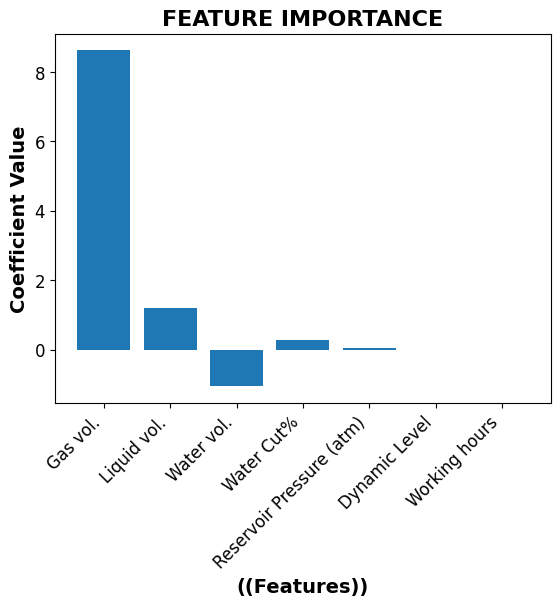

In [32]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['Liquid vol.', 'Gas vol.', 'Water vol.', 'Water Cut%', 'Working hours', 'Dynamic Level', 'Reservoir Pressure (atm)']
coefficients = model_l_r.coef_
sorted_indices = np.argsort(np.abs(coefficients))[::-1]

plt.bar([feature_names[i] for i in sorted_indices], coefficients[sorted_indices])
plt.xlabel('((Features))', fontsize=14, fontweight='bold')
plt.ylabel('Coefficient Value', fontsize=14, fontweight='bold')
plt.title('FEATURE IMPORTANCE', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()
